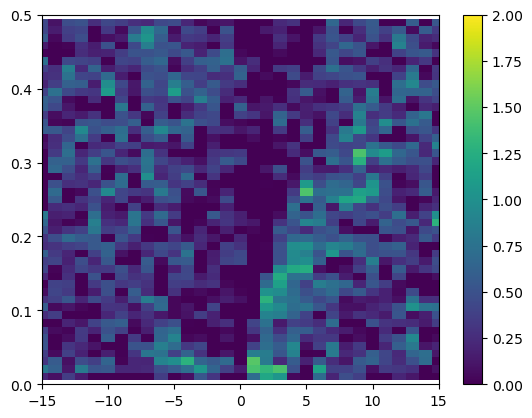

In [1]:
from PowerSpec_alt import EquatorialSpectrumAnalyzer
import numpy as np

# data shape: (time, lat, lon)
data = np.random.randn(365, 33, 144)

analyzer = EquatorialSpectrumAnalyzer(
    n_window=96,
    n_overlap=48,
    # you can also tweak background filter params if needed
    # f_running=10, low_k_running=10, high_k_running=40,
)

symm_ps, asym_ps, symm_ps_rm_bg, asym_ps_rm_bg, wn, fr = analyzer.compute(data)


import numpy as np
import netCDF4 as nc
from matplotlib import pyplot as plt
import PowerSpec



fpath = "/work/DATA/Satellite/OLR/olr_anomaly.nc";

with nc.Dataset( fpath, "r" ) as ds:
    dims = {
        key: ds[key][:]
        for key in ds.dimensions.keys()
    };
    
    lat_lim = np.where( ( dims["lat"] >= -5.0 ) & ( dims["lat"] <= 5.0 ) )[0];
    dims["lat"]  = dims["lat"][lat_lim];
    dims["time"] = dims["time"][:1000];
    
    olr = ds["olr"][:1000, lat_lim, :];

analyzer = EquatorialSpectrumAnalyzer(
    n_window=96,
    n_overlap=48,
    # you can also tweak background filter params if needed
    # f_running=10, low_k_running=10, high_k_running=40,
)

symm_ps, asym_ps, symm_ps_rm_bg, asym_ps_rm_bg, wn, fr = analyzer.compute(olr)

plt.pcolormesh(wn, fr, np.log(symm_ps_rm_bg), vmin=0, vmax=2)
plt.xlim(-15, 15)
plt.ylim(0, 0.5)
plt.colorbar()
plt.savefig("ps.test.png")